# Figures and analysis

This notebook contains scripts to reproduce the figures and analytical results of the manuscript. Full details of the plotting functions are typically contained in `figures.py`. Figures are saved in PDF format in the `figures/` folder.


# Contents
* [Libraries](#package)
* [Figures and data analysis](#figure)
    * [Figure 1. popDMS overview and performance comparison](#overview)
    * [Figure 2. Consistency of popDMS and prior methods, and epistasis](#epistasis)
    * [Figure S1. Robustness to finite sampling in simulations](#sampling)
    * [Figure S2. Comparison of inferences at single sites](#site)
    * [Analysis. Comparison of inferred mutation effects and natural frequencies](#natural)

## Libraries<a class = "anchor" id = "package"></a>

In [1]:
# Full library list and version numbers

print('Figures below were produced using the following packages:')

import os
import sys
print('python ==', sys.version)

import numpy as np
print('numpy ==', np.__version__)

import scipy as sp
import scipy.stats as st
print('scipy ==', sp.__version__)

import pandas as pd
print('pandas ==', pd.__version__)

import matplotlib
import matplotlib.pyplot as plt
print('matplotlib ==', matplotlib.__version__)

import seaborn as sns 
print('seaborn ==', sns.__version__)

import logomaker as lm

import warnings

import figures as figs
import popDMS as pop

from importlib import reload

Figures below were produced using the following packages:
python == 3.10.14 | packaged by conda-forge | (main, Mar 20 2024, 12:51:49) [Clang 16.0.6 ]
numpy == 1.26.4
scipy == 1.13.1
pandas == 2.2.2
matplotlib == 3.8.4
seaborn == 0.13.2


In [2]:
# GLOBAL VARIABLES

## Pointers to data and output
OUT_DIR  = 'output/'                                         # general directory for output
FREQ_DIR = os.path.join(OUT_DIR, 'variant_frequencies/')     # directory for experimental variant (codon/aa) frequencies
SEL_DIR  = os.path.join(OUT_DIR, 'selection_coefficients/')  # directory for inferred selection coefficients
DATA_DIR = 'data/'                                           # general directory for external data
RAW_DIR  = os.path.join(DATA_DIR, 'raw_data/')               # unprocessed data directory
FIG_DIR  = 'figures/'                                        # directory for figures

## Figures and data analysis <a class = "anchor" id = "figure"></a>

### Figure 1. Overview and performance comparison <a class = "anchor" id = "overview"></a>

protein			R (pop)	R (alt)	R (between, Pearson/Spearman)
Flu_WSN			0.88	0.58	0.88	0.72
Flu_A549		0.95	0.74	0.83	0.75
Flu_CCL141		0.95	0.74	0.81	0.77
Flu_Aichi68C		0.92	0.74	0.85	0.67
Flu_PR8			0.79	0.59	0.87	0.65
Flu_MatrixM1		0.84	0.48	0.89	0.67
H3N2 NA			0.95	0.83	0.71	0.78
Spike			0.98	0.88	0.52	0.80
ZIKV			0.83	0.68	0.93	0.83
Perth2009		0.93	0.73	0.90	0.84
Flu_MS			0.91	0.76	0.86	0.73
Flu_MxA			0.92	0.91	0.77	0.57
Flu_MxAneg		0.92	0.80	0.87	0.74
HIV_BG505		0.93	0.80	0.76	0.83
HIV_BF520		0.89	0.69	0.68	0.74
HIV_CD4_human		0.92	0.75	0.85	0.84
HIV_CD4_rhesus		0.88	0.50	0.77	0.80
HIV_bnAbs_FP16		0.89	0.58	0.83	0.84
HIV_bnAbs_FP20		0.88	0.56	0.83	0.84
HIV_bnAbs_VRC34		0.89	0.56	0.83	0.84
HDR_Y2H_1		0.97	0.94	0.31	0.68
HDR_Y2H_2		0.97	0.86	0.29	0.65
HDR_E3			0.88	0.82	0.56	0.70
WWdomain_YAP1		0.99	0.97	0.54	0.62
Ubiq_Ube4b		0.97	0.87	0.69	0.73
HDR_DBR1		0.84	0.63	0.43	0.59
Thrombo_TpoR_1		0.94	0.45	0.55	0.43
Thrombo_TpoR_2		0.87	0.41	0.64	0.60
average			0.91	0.71	0.72	0.72

6/240830 = 2.4

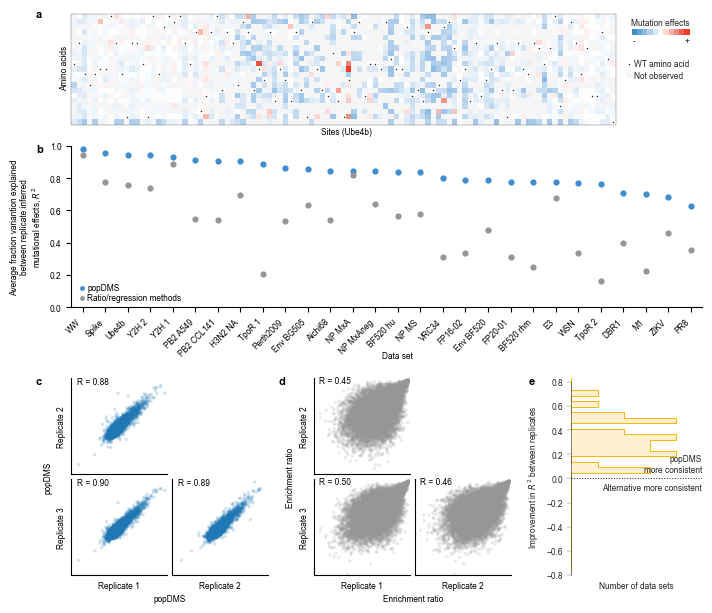

In [5]:
reload(figs)
figs.fig_methods_comparison(fig_title='fig-1-overview-pearson-test-0.2.pdf')
plt.show()

protein			R (pop)	R (alt)	R (between, Pearson/Spearman)
Flu_WSN			0.51	0.22	0.64	0.61
Flu_A549		0.72	0.30	0.50	0.68
Flu_CCL141		0.72	0.33	0.49	0.71
Flu_Aichi68C		0.68	0.42	0.60	0.53
Flu_PR8			0.23	0.13	0.67	0.60
Flu_MatrixM1		0.27	0.10	0.71	0.46
H3N2 NA			0.86	0.83	0.73	0.81
Spike			0.90	0.88	0.73	0.79
ZIKV			0.38	0.23	0.76	0.72
Perth2009		0.73	0.48	0.77	0.77
Flu_MS			0.71	0.44	0.61	0.60
Flu_MxAneg		0.71	0.49	0.71	0.70
HIV_BG505		0.84	0.47	0.60	0.81
HIV_BF520		0.81	0.28	0.41	0.72
HIV_CD4_human		0.85	0.63	0.76	0.77
HIV_CD4_rhesus		0.76	0.37	0.68	0.72
HIV_bnAbs_FP16		0.71	0.32	0.65	0.78
HIV_bnAbs_FP20		0.70	0.30	0.66	0.77
HIV_bnAbs_VRC34		0.73	0.31	0.65	0.76
HDR_Y2H_1		0.93	0.94	0.54	0.73
HDR_Y2H_2		0.95	0.86	0.47	0.71
HDR_E3			0.83	0.82	0.63	0.72
WWdomain_YAP1		0.99	0.97	0.56	0.62
Ubiq_Ube4b		0.98	0.87	0.66	0.69
HDR_DBR1		0.52	0.59	0.68	0.69
Thrombo_TpoR_1		0.95	0.44	0.56	0.41
Thrombo_TpoR_2		0.86	0.40	0.70	0.57
average			0.73	0.50	0.63	0.68

0/219455 = 0.00e+00% substantially deleterio

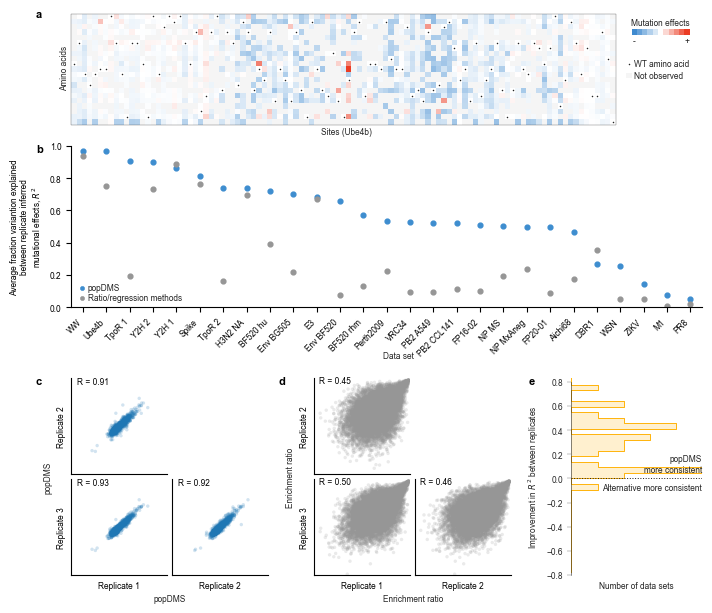

In [31]:
reload(figs)
figs.fig_methods_comparison(fig_title='fig-1-overview-pearson-nowt.pdf')
plt.show()

### Figure 2. Consistency of popDMS and prior methods, and epistasis <a class = "anchor" id = "epistasis"></a>

epistasis correlations between popDMS and regression
Pearson 	0.73,	p=0.00e+00
Spearman	0.75,	p=0.00e+00


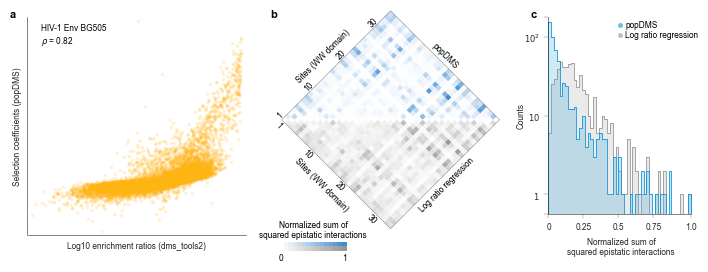

In [59]:
reload(figs)
figs.fig_comp_epistasis()
plt.show()

### Figure S1. Robustness to finite sampling in simulations <a class = "anchor" id = "sampling"></a>

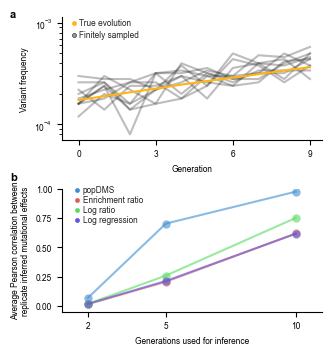

In [4]:
reload(figs)
figs.fig_finite_sampling()
plt.show()

### Figure S2. Comparison of inferences at single sites <a class = "anchor" id = "site"></a>

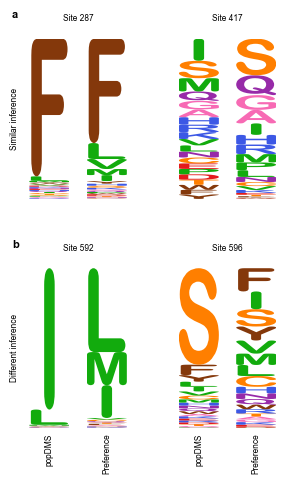

In [5]:
reload(figs)
figs.fig_site_spectrum()
plt.show()

### Analysis. Comparison of inferred mutant effects and natural frequencies <a class = "anchor" id = "natural"></a>

In [6]:
df_freq  = pd.read_csv('./data/raw_data/H1_HumanSwine_alignment_frequency_mod.txt', sep="\t")
df_freq  = df_freq.drop(['WT_AA'], axis=1)
df_sele  = pd.read_csv('./output/selection_coefficients/WSN_selection_coefficients.csv.gz')
df_pref1 = pd.read_csv('./data/prefs/WSN-1_prefs.txt', sep="\t")
df_pref1 = df_pref1.drop(['WT_AA', 'PI_*'], axis = 1)
df_pref2 = pd.read_csv('./data/prefs/WSN-2_prefs.txt', sep="\t")
df_pref2 = df_pref2.drop(['WT_AA', 'PI_*'], axis = 1)
df_pref3 = pd.read_csv('./data/prefs/WSN-3_prefs.txt', sep="\t")
df_pref3 = df_pref3.drop(['WT_AA', 'PI_*'], axis = 1)
df_pref  = pd.concat([df_pref1, df_pref2, df_pref3]).groupby(level=0).mean()

sites = np.array(df_freq['SITE'])
ranks_pref = []
z_pref     = []
ranks_sele = []
z_sele     = []

aas = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
rank_min = 0

for s in sites:
    if s==1:
        continue
    
    df_f_site = df_freq[df_freq['SITE']==s]
    f_site = [df_f_site[aa] for aa in aas]
    top = np.argmax(f_site)
    
    df_p_site  = df_pref[df_pref['#SITE']==s]
    pref_site  = [df_p_site['PI_%s' % aa] for aa in aas]
    site_ranks = st.rankdata(pref_site) 
    ranks_pref.append(len(aas)+1 - site_ranks[top])

    if s==2:
        rank_min = len(aas)+1 - np.max(site_ranks)
    
    m_site   = np.mean(pref_site)
    std_site = np.std(pref_site)
    z_pref.append((pref_site[top]-m_site)/std_site)
    
    df_s_site  = df_sele[df_sele['site']==s]
    sele_site  = [df_s_site[df_s_site['amino_acid']==aa]['joint'] for aa in aas]
    site_ranks = st.rankdata(sele_site)
    ranks_sele.append(len(aas)+1 - site_ranks[top])
    
    m_site   = np.mean(sele_site)
    std_site = np.std(sele_site)
    z_sele.append((sele_site[top]-m_site)/std_site)

print('rank of WT AA (min %d, smaller is better)' % rank_min)
print('method\tmean\tmedian\tstd')
print('pref\t%.1f\t%.1f\t%.1f' % (np.mean(ranks_pref), np.median(ranks_pref), np.std(ranks_pref)))
print('s\t%.1f\t%.1f\t%.1f\n'  % (np.mean(ranks_sele), np.median(ranks_sele), np.std(ranks_sele)))

print('z score of WT AA (larger is better)')
print('method\tmean\tstd')
print('pref\t%.1f\t%.1f' % (np.mean(z_pref), np.std(z_pref)))
print('s\t%.1f\t%.1f\n'  % (np.mean(z_sele), np.std(z_sele)))

rank of WT AA (min 1, smaller is better)
method	mean	median	std
pref	2.7	1.0	3.2
s	2.1	1.0	3.7

z score of WT AA (larger is better)
method	mean	std
pref	2.6	1.5
s	3.5	1.5



### Analysis. Sites that are discordant for ratios/regression but consistent for popDMS.

In [43]:
import numpy as np
import pandas as pd

name = 'HIV Env BG505'
filename = 'BG505'
n_replicates = 3
gamma = 2e-3

ex_sites = [                            46,                                  48]
ex_aas   = [['D', 'N', 'E', 'P', 'A', 'W'], ['D', 'V', 'K', 'M', 'F', 'I', 'Y']]

df = [pd.read_csv(os.path.join(FREQ_DIR, name + ('_single_aa_rep_%d.csv.gz' % (rep+1)))) for rep in range(n_replicates)]

for i_site in range(len(ex_sites)):
    print('%s site %d' % (name, ex_sites[i_site]))
    print('residue\treplicate\tx0\t\tx1\t\tratio\t\td log\t\td logit\t\traw s\t\treg s')

    for a in ex_aas[i_site]:
        for i_rep in range(n_replicates):
            df_temp = df[i_rep][(df[i_rep]['site']==ex_sites[i_site]) & (df[i_rep]['aa']==a)]
            x0 = df_temp[df_temp['generation']==0].iloc[0]['frequency']
            x1 = df_temp[df_temp['generation']==1].iloc[0]['frequency']
            
            xvar   = ((x0+x1)/2) * (1 - ((x0+x1)/2)) 
            ratio  = x1/x0
            dlog   = np.log(x1/x0)
            dlogit = np.log(x1/(1-x1))-np.log(x0/(1-x0))
            if ratio==0:
                dlog = -999
                dlogit = -999
            s_raw  = (x1 - x0) / xvar
            s_reg  = (x1 - x0) / (xvar + gamma)

            res_str = a if i_rep==0 else ''
            print('%s\t%d\t\t%.3e\t%.3e\t%.3e\t%.3e\t%.3e\t%.3e\t%.3e' % (res_str, i_rep+1, x0, x1, ratio, dlog, dlogit, s_raw, s_reg))

    print('')

HIV Env BG505 site 46
residue	replicate	x0		x1		ratio		d log		d logit		raw s		reg s
D	1		9.976e-01	9.984e-01	1.001e+00	8.032e-04	4.126e-01	4.069e-01	2.019e-01
	2		9.976e-01	9.982e-01	1.001e+00	6.499e-04	3.159e-01	3.133e-01	1.593e-01
	3		9.977e-01	9.984e-01	1.001e+00	6.638e-04	3.480e-01	3.445e-01	1.689e-01
N	1		2.034e-04	3.624e-04	1.782e+00	5.775e-01	5.777e-01	5.621e-01	6.965e-02
	2		1.997e-04	4.126e-04	2.066e+00	7.255e-01	7.257e-01	6.955e-01	9.230e-02
	3		1.614e-04	3.657e-04	2.265e+00	8.176e-01	8.178e-01	7.751e-01	9.023e-02
E	1		2.423e-04	3.087e-04	1.274e+00	2.424e-01	2.424e-01	2.413e-01	2.920e-02
	2		2.334e-04	3.409e-04	1.461e+00	3.791e-01	3.792e-01	3.747e-01	4.703e-02
	3		1.902e-04	3.031e-04	1.593e+00	4.659e-01	4.660e-01	4.578e-01	5.024e-02
P	1		1.143e-04	5.906e-05	5.168e-01	-6.601e-01	-6.602e-01	-6.372e-01	-2.646e-02
	2		1.030e-04	1.021e-04	9.907e-01	-9.321e-03	-9.322e-03	-9.322e-03	-4.546e-04
	3		9.067e-05	1.753e-04	1.934e+00	6.594e-01	6.595e-01	6.366e-01	3.969e-02
A	1		1.257e-04	1

/var/folders/s6/r0hv0w_j5pnbjrpqcsn9sq8m0000gp/T/ipykernel_42029/1354219203.py:26: RuntimeWarning: divide by zero encountered in log
  dlog   = np.log(x1/x0)
/var/folders/s6/r0hv0w_j5pnbjrpqcsn9sq8m0000gp/T/ipykernel_42029/1354219203.py:27: RuntimeWarning: divide by zero encountered in log
  dlogit = np.log(x1/(1-x1))-np.log(x0/(1-x0))


### Analysis. Effects of sequence background on inferred coefficients.

In [54]:
import numpy as np
import pandas as pd

name = 'Ube4b'
n_replicates = 2
gamma = 2.8e-04

ex_sites = [             34]
ex_aas   = [['A', 'D', 'N']]

df = [pd.read_csv(os.path.join(FREQ_DIR, name + ('_single_aa_rep_%d.csv.gz' % (rep+1)))) for rep in range(n_replicates)]

for i_site in range(len(ex_sites)):
    print('%s site %d' % (name, ex_sites[i_site]))
    print('residue\treplicate\tx0\t\tx1\t\tratio\t\td log\t\td logit\t\traw s\t\treg s')

    for a in ex_aas[i_site]:
        for i_rep in range(n_replicates):
            df_temp = df[i_rep][(df[i_rep]['site']==ex_sites[i_site]) & (df[i_rep]['aa']==a)]
            x = [df_temp[df_temp['generation']==i].iloc[0]['frequency'] for i in range(4)]

            xvar   = [((x[i]+x[i+1])/2) * (1 - ((x[i]+x[i+1])/2)) for i in range(len(x)-1)] 
            ratio  = x[-1]/x[0]
            dlog   = np.log(x[-1]/x[0])
            dlogit = np.log(x[-1]/(1-x[-1]))-np.log(x[0]/(1-x[0]))
            s_raw  = (x[-1] - x[0]) / np.sum(xvar)
            s_reg  = (x[-1] - x[0]) / (np.sum(xvar) + gamma)

            res_str = a if i_rep==0 else ''
            print('%s\t%d\t\t%.3e\t%.3e\t%.3e\t%.3e\t%.3e\t%.3e\t%.3e' % (res_str, i_rep+1, x[0], x[-1], ratio, dlog, dlogit, s_raw, s_reg))

    print('')

Ube4b site 34
residue	replicate	x0		x1		ratio		d log		d logit		raw s		reg s
A	1		4.158e-05	2.220e-04	5.339e+00	1.675e+00	1.675e+00	5.177e-01	2.870e-01
	2		4.158e-05	1.694e-04	4.075e+00	1.405e+00	1.405e+00	4.776e-01	2.334e-01
D	1		9.970e-01	9.993e-01	1.002e+00	2.336e-03	1.474e+00	5.403e-01	5.074e-01
	2		9.970e-01	9.993e-01	1.002e+00	2.371e-03	1.525e+00	5.488e-01	5.153e-01
N	1		3.598e-05	1.081e-05	3.006e-01	-1.202e+00	-1.202e+00	-3.682e-01	-7.225e-02
	2		3.598e-05	9.364e-06	2.602e-01	-1.346e+00	-1.346e+00	-3.979e-01	-7.673e-02



## Response figures

protein			R (pop)	R (alt)	R (between, Pearson/Spearman)
Flu_WSN			0.76	0.44	0.83	0.66
Flu_A549		0.78	0.66	0.83	0.72
Flu_CCL141		0.76	0.69	0.82	0.74
Flu_Aichi68C		0.75	0.53	0.80	0.59
Flu_PR8			0.68	0.40	0.87	0.65
Flu_MatrixM1		0.68	0.29	0.83	0.54
H3N2 NA			0.91	0.82	0.73	0.81
Spike			0.79	0.95	0.52	0.80
ZIKV			0.73	0.53	0.92	0.76
Perth2009		0.78	0.54	0.89	0.79
Flu_MS			0.77	0.60	0.81	0.65
Flu_MxA			0.77	0.82	0.77	0.57
Flu_MxAneg		0.77	0.64	0.87	0.74
HIV_BG505		0.77	0.64	0.82	0.82
HIV_BF520		0.66	0.45	0.75	0.74
HIV_CD4_human		0.72	0.54	0.80	0.79
HIV_CD4_rhesus		0.60	0.35	0.67	0.74
HIV_bnAbs_FP16		0.65	0.40	0.78	0.79
HIV_bnAbs_FP20		0.63	0.37	0.77	0.78
HIV_bnAbs_VRC34		0.65	0.38	0.77	0.78
HDR_Y2H_1		0.91	0.91	0.31	0.68
HDR_Y2H_2		0.83	0.81	0.29	0.65
HDR_E3			0.77	0.81	0.56	0.70
WWdomain_YAP1		0.96	0.97	0.54	0.62
Ubiq_Ube4b		0.91	0.83	0.65	0.70
HDR_DBR1		0.51	0.63	0.37	0.61
Thrombo_TpoR_1		0.58	0.38	0.50	0.42
Thrombo_TpoR_2		0.69	0.42	0.57	0.57
average			0.74	0.60	0.70	0.69

2/240830 = 8.3

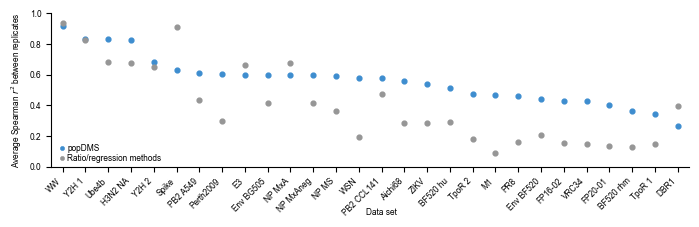

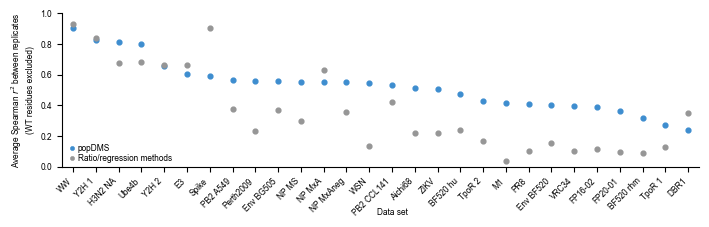

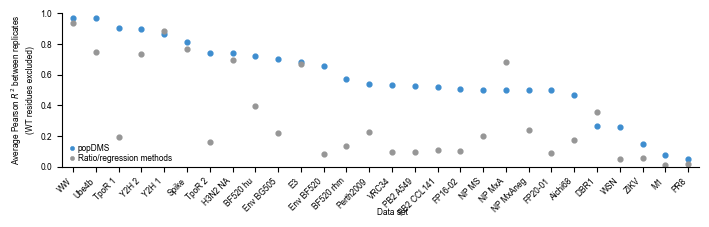

In [60]:
reload(figs)

data = {'corr_function': 'spearman',
        'nowt': False,
        'ylabel': 'Average Spearman ' + r'$r^2$' + ' between replicates',
        'fig_title': 'fig-comp-spearman.png'}
figs.fig_review_comparison(**data)

data = {'corr_function': 'spearman',
        'nowt': True,
        'ylabel': 'Average Spearman ' + r'$r^2$' + ' between replicates\n(WT residues excluded)',
        'fig_title': 'fig-comp-spearman-nowt.png'}
figs.fig_review_comparison(**data)

data = {'corr_function': 'pearson',
        'nowt': True,
        'ylabel': 'Average Pearson ' + r'$R^2$' + ' between replicates\n(WT residues excluded)',
        'fig_title': 'fig-comp-pearson-nowt.png'}
figs.fig_review_comparison(**data)

protein			R (pop)	R (alt)	R (between, Pearson/Spearman)
Flu_WSN			0.90	0.58	0.85	0.68
Flu_A549		0.97	0.74	0.82	0.70
Flu_CCL141		0.97	0.74	0.81	0.72
Flu_Aichi68C		0.94	0.74	0.81	0.60
Flu_PR8			0.77	0.59	0.85	0.56
Flu_MatrixM1		0.86	0.48	0.86	0.61
H3N2 NA			0.96	0.83	0.74	0.81
Spike			0.96	0.88	0.65	0.71
ZIKV			0.85	0.68	0.91	0.72
Perth2009		0.97	0.73	0.84	0.70
Flu_MS			0.92	0.76	0.82	0.66
Flu_MxA			0.93	0.91	0.75	0.55
Flu_MxAneg		0.93	0.80	0.83	0.67
HIV_BG505		0.97	0.80	0.81	0.79
HIV_BF520		0.93	0.69	0.75	0.72
HIV_CD4_human		0.96	0.75	0.70	0.71
HIV_CD4_rhesus		0.92	0.50	0.62	0.71
HIV_bnAbs_FP16		0.91	0.58	0.76	0.77
HIV_bnAbs_FP20		0.91	0.56	0.75	0.77
HIV_bnAbs_VRC34		0.92	0.56	0.75	0.76
HDR_Y2H_1		0.94	0.94	0.64	0.68
HDR_Y2H_2		0.90	0.86	0.66	0.72
HDR_E3			0.88	0.82	0.54	0.70
WWdomain_YAP1		0.99	0.97	0.42	0.63
Ubiq_Ube4b		0.99	0.87	0.53	0.65
HDR_DBR1		0.33	0.63	0.50	0.55
Thrombo_TpoR_1		0.82	0.45	0.59	0.48
Thrombo_TpoR_2		0.82	0.41	0.70	0.64
average			0.90	0.71	0.72	0.68

6/240830 = 2.4

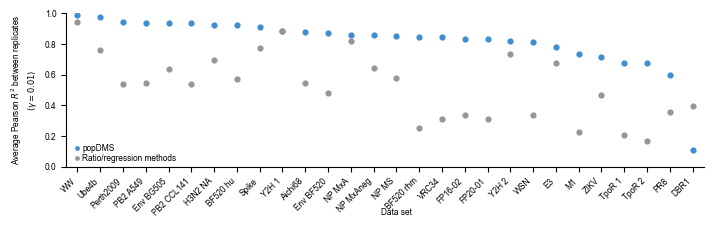

In [53]:
reload(figs)
data = {'corr_function': 'pearson',
        'nowt': False,
        'ylabel': 'Average Pearson ' + r'$R^2$' + ' between replicates\n' + r'$(\gamma = 0.01)$',
        'fig_title': 'fig-comp-pearson-g=1e-2.png'}
figs.fig_review_comparison(**data)